In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
import tensorflow.keras
tensorflow.keras.__version__

'2.3.0-tf'

In [3]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,46))
model.add(SimpleRNN(46))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
57/57 [==============================] - 14s 237ms/step - loss: 2.7576 - acc: 0.3038 - val_loss: 2.4321 - val_acc: 0.3450
Epoch 2/10
57/57 [==============================] - 15s 267ms/step - loss: 2.2508 - acc: 0.4344 - val_loss: 2.1489 - val_acc: 0.4697
Epoch 3/10
57/57 [==============================] - 13s 226ms/step - loss: 2.1061 - acc: 0.4785 - val_loss: 2.0372 - val_acc: 0.4964
Epoch 4/10
57/57 [==============================] - 12s 217ms/step - loss: 2.0654 - acc: 0.4887 - val_loss: 2.5254 - val_acc: 0.4302
Epoch 5/10
57/57 [==============================] - 13s 221ms/step - loss: 1.9224 - acc: 0.5111 - val_loss: 1.9142 - val_acc: 0.5164
Epoch 6/10
57/57 [==============================] - 15s 265ms/step - loss: 1.7785 - acc: 0.5425 - val_loss: 1.8401 - val_acc: 0.5331
Epoch 7/10
57/57 [==============================] - 13s 235ms/step - loss: 1.6266 - acc: 0.5932 - val_loss: 1.7562 - val_acc: 0.5565
Epoch 8/10
57/57 [==============================] - 13s 229ms/step - 

In [10]:
import matplotlib.pyplot as plt

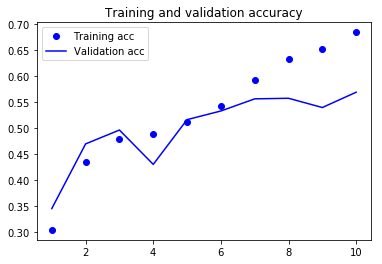

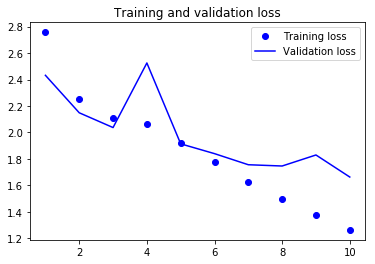

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model = Sequential()
model.add(Embedding(max_features,46))
model.add(SimpleRNN(46))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels,
                    epochs=8,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/8
57/57 [==============================] - 12s 219ms/step - loss: 2.6747 - acc: 0.2983 - val_loss: 2.4210 - val_acc: 0.3450
Epoch 2/8
57/57 [==============================] - 14s 248ms/step - loss: 2.3481 - acc: 0.3737 - val_loss: 2.3180 - val_acc: 0.3773
Epoch 3/8
57/57 [==============================] - 15s 260ms/step - loss: 2.1643 - acc: 0.4509 - val_loss: 2.2630 - val_acc: 0.3973
Epoch 4/8
57/57 [==============================] - 12s 219ms/step - loss: 2.0013 - acc: 0.4945 - val_loss: 2.2446 - val_acc: 0.4018
Epoch 5/8
57/57 [==============================] - 13s 226ms/step - loss: 1.8348 - acc: 0.5332 - val_loss: 2.2698 - val_acc: 0.4073
Epoch 6/8
57/57 [==============================] - 14s 250ms/step - loss: 1.6521 - acc: 0.5755 - val_loss: 2.2508 - val_acc: 0.4062
Epoch 7/8
57/57 [==============================] - 16s 273ms/step - loss: 1.4913 - acc: 0.6118 - val_loss: 2.2008 - val_acc: 0.4213
Epoch 8/8
57/57 [==============================] - 15s 263ms/step - loss: 1.

In [13]:
model.fit(train_data, train_labels, epochs=8, batch_size=512)
results = model.evaluate(test_data, test_labels)

Epoch 1/8
18/18 [==============================] - 10s 535ms/step - loss: 1.3954 - acc: 0.6474
Epoch 2/8
18/18 [==============================] - 11s 633ms/step - loss: 1.3019 - acc: 0.6762
Epoch 3/8
18/18 [==============================] - 12s 685ms/step - loss: 1.2308 - acc: 0.6943
Epoch 4/8
18/18 [==============================] - 13s 725ms/step - loss: 1.1833 - acc: 0.7082
Epoch 5/8
18/18 [==============================] - 10s 558ms/step - loss: 1.0597 - acc: 0.7433
Epoch 6/8
18/18 [==============================] - 11s 596ms/step - loss: 1.0076 - acc: 0.7556
Epoch 7/8
18/18 [==============================] - 12s 647ms/step - loss: 0.9462 - acc: 0.7730
Epoch 8/8
71/71 [==============================] - 3s 38ms/step - loss: 2.3884 - acc: 0.4207


In [14]:
results 

[2.3883886337280273, 0.4207479953765869]